In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data=pd.read_csv('order_items.csv')
raw_data

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [3]:
from collections import Counter
demand=Counter(raw_data['product_id'])
demand

Counter({'aca2eb7d00ea1a7b8ebd4e68314663af': 527,
         '99a4788cb24856965c36a24e339b6058': 488,
         '422879e10f46682990de24d770e7f83d': 484,
         '389d119b48cf3043d311335e499d9c6b': 392,
         '368c6c730842d78016ad823897a372db': 388,
         '53759a2ecddad2bb87a079a1f1519f73': 373,
         'd1c427060a0f73f6b889a5c7c61f2ac4': 343,
         '53b36df67ebb7c41585e8d54d6772e08': 323,
         '154e7e31ebfa092203795c972e5804a6': 281,
         '3dd2a17168ec895c781a9191c1e95ad7': 274,
         '2b4609f8948be18874494203496bc318': 260,
         '7c1bd920dbdf22470b68bde975dd3ccf': 231,
         'a62e25e09e05e6faf31d90c6ec1aa3d1': 226,
         '5a848e4ab52fd5445cdc07aab1c40e48': 197,
         'bb50f2e236e5eea0100680137654686c': 195,
         'e0d64dcfaa3b6db5c54ca298ae101d05': 194,
         'e53e557d5a159f5aa2c5e995dfdf244b': 183,
         '42a2c92a0979a949ca4ea89ec5c7b934': 183,
         'b532349fe46b38fbc7bb3914c1bdae07': 169,
         '35afc973633aaeb6b877ff57b2793310': 165,


In [4]:
time_s=raw_data.loc[raw_data['product_id']=='53b36df67ebb7c41585e8d54d6772e08']
product_data=pd.DataFrame()
product_data['Date']=time_s['shipping_limit_date']
product_data['Price']=time_s['price']
product_data

,Date,Price
114,2018-05-15 04:31:26,99.90
483,2018-05-07 05:30:45,99.90
1974,2017-10-02 03:35:43,134.90
2047,2018-03-05 16:35:43,128.89
2079,2018-04-03 10:50:16,115.00
...,...,...
110720,2017-09-08 08:44:16,169.90
111101,2018-04-23 09:51:26,110.00
111121,2017-06-20 09:25:24,163.00
111649,2018-05-04 11:10:31,106.90


In [5]:
from statsmodels.tsa.stattools import adfuller

product_data['Date']=pd.to_datetime(product_data['Date']).dt.date
result=adfuller(product_data['Price'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.501415
p-value: 0.000000
Critical Values:
	1%: -3.451
	5%: -2.871
	10%: -2.572


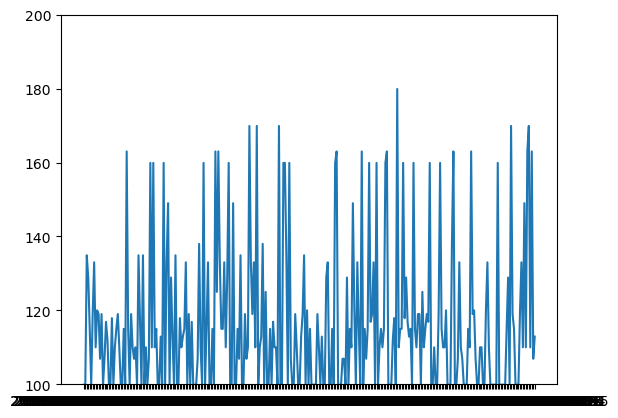

In [9]:
plt.plot(time_s['shipping_limit_date'],time_s['price'])
plt.ylim(100,200)
plt.show()

In [7]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(product_data['Price'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  323
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1428.416
Date:                Fri, 08 Dec 2023   AIC                           2862.832
Time:                        16:41:47   BIC                           2874.155
Sample:                             0   HQIC                          2867.353
                                - 323                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0274      0.059      0.466      0.641      -0.088       0.142
ma.L1         -0.9457      0.020    -47.550      0.000      -0.985      -0.907
sigma2       414.6532     27.087     15.308      0.000     361.564     467.743
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                93.86
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.49   Skew:                             1.28
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


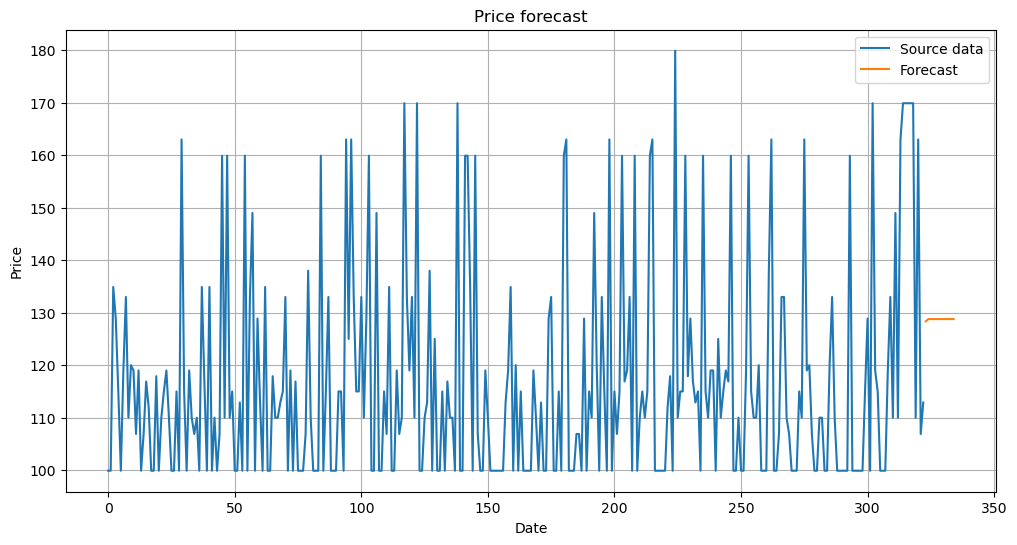

In [8]:
forecast_future=model_fit.forecast(steps=12)
future_dates = pd.date_range(start='2019-01-01', periods=12, freq='M')
forecast_df = pd.DataFrame({'Date': future_dates, 'Forecast': forecast_future})
product_data=pd.concat([product_data,forecast_df],ignore_index=True)

plt.figure(figsize=(12, 6))
plt.plot(product_data.index[:-12], product_data['Price'][:-12], label='Source data')
plt.plot(product_data.index[-12:], product_data['Forecast'][-12:], label='Forecast')
plt.title('Price forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
